## Observations and Insights 

Observations:
- Each Drug Regimen had a 'statistically significant' sample size. (n >= 30).
- There was a nearly equal sample of male and female mice.
- Mouse weight was highly positively correlated (r-squared = 0.84) with average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [2]:
# Checking the number of mice in the DataFrame.
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows= merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep= 'last')]
duplicate_rows.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep= False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1883 non-null   object 
 1   Drug Regimen        1883 non-null   object 
 2   Sex                 1883 non-null   object 
 3   Age_months          1883 non-null   int64  
 4   Weight (g)          1883 non-null   int64  
 5   Timepoint           1883 non-null   int64  
 6   Tumor Volume (mm3)  1883 non-null   float64
 7   Metastatic Sites    1883 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.4+ KB


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_stats = clean_df.groupby('Drug Regimen')
mean = grouped_stats['Tumor Volume (mm3)'].mean()
median = grouped_stats['Tumor Volume (mm3)'].median()
variance = grouped_stats['Tumor Volume (mm3)'].var()
std_dev = grouped_stats['Tumor Volume (mm3)'].std()
sem = grouped_stats['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_stats = pd.DataFrame({
    "Tumor Volume Mean": mean,
    "Tumor Volume Median": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume St Dev": std_dev,
    "Tumor Volume SEM": sem
})

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

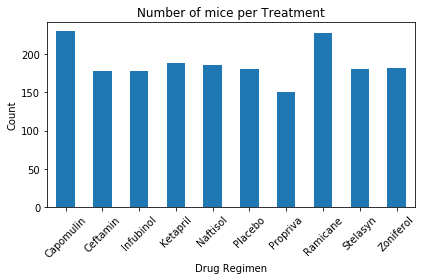

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
grouped_count = grouped_stats['Drug Regimen'].count()
chart = grouped_count.plot(kind='bar', title="Number of mice per Treatment",rot=45)
chart.set_xlabel("Drug Regimen")
chart.set_ylabel("Count")
plt.tight_layout()
plt.show()

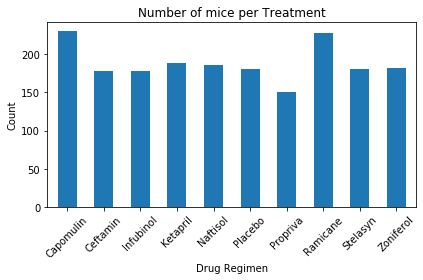

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(grouped_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, grouped_count, label= 'Drug Regimen', width = 0.52)
plt.xticks(tick_locations, list(grouped_count.index), rotation=45)
plt.xlim(-0.55, len(x_axis)-0.45)
plt.title('Number of mice per Treatment')
plt.ylabel('Count')
plt.xlabel('Drug Regimen')
plt.tight_layout()

plt.show()

## Pie Plots

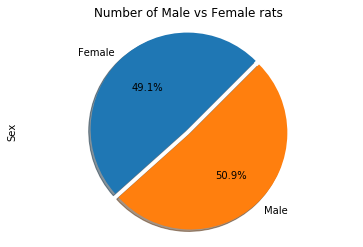

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby('Sex')
gender_count = gender_group['Sex'].count()

gender_count.plot(kind='pie', explode=[0.05,0], autopct='%1.1f%%', 
                  shadow=True, title='Number of Male vs Female rats',
                  startangle=45)

plt.axis("equal")
plt.show()

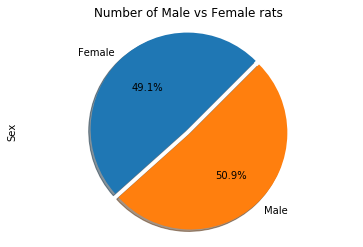

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=gender_count.index, explode=[0.05,0], autopct='%1.1f%%', 
        shadow=True, startangle=45)
plt.title('Number of Male vs Female rats')
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
four_drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
four_drugs_data = clean_df[clean_df['Drug Regimen'].isin(four_drugs)]
grouped_four_data = four_drugs_data.groupby(['Drug Regimen','Mouse ID'])\
.agg(last_tumor=('Tumor Volume (mm3)', lambda x: x.iloc[-1]))

grouped_four_data_unstack = grouped_four_data.stack(level=0).unstack(level=0)

for drug in four_drugs:
    quartiles = grouped_four_data_unstack[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print()
    print(f"The lower quartile of {drug} is: {round(lowerq,2)}")
    print(f"The upper quartile of {drug} is: {round(upperq,2)}")
    print(f"The interquartile range of {drug} is: {round(iqr,2)}")
    print(f"The the median of {drug} is: {round(quartiles[0.5],2)} ")
    print(f"Values below {round(lower_bound,2)} for {drug} could be outliers.")
    print(f"Values above {round(upper_bound,2)} for {drug} could be outliers.")



The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.7 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.
Values above 82.74 for Infubinol could be outliers.

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.36 

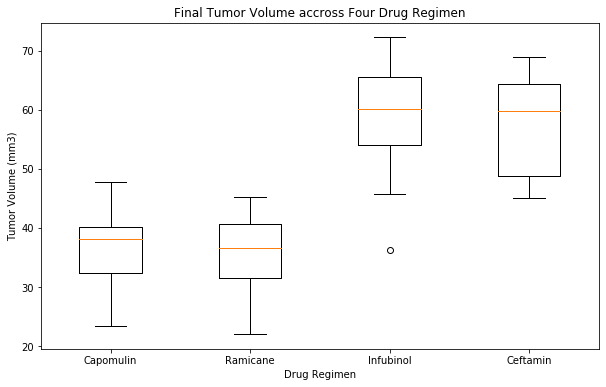

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#for drug in four_drugs:
#    grouped_four_data_unstack[drug].plot(kind='box')
#    
#plt.tight_layout()
box_plot_list = [grouped_four_data_unstack['Capomulin'].dropna(),
                 grouped_four_data_unstack['Ramicane'].dropna(),
                 grouped_four_data_unstack['Infubinol'].dropna(),
                 grouped_four_data_unstack['Ceftamin'].dropna()]

fig1, ax1 = plt.subplots(figsize=(10,6))

ax1.boxplot(box_plot_list)
ax1.set_title('Final Tumor Volume accross Four Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4],four_drugs)
plt.show()

## Line and Scatter Plots

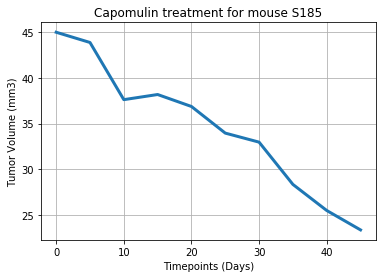

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
s185_cap = capomulin_data.loc[capomulin_data['Mouse ID']=='s185']
plt.plot(s185_cap['Timepoint'], s185_cap['Tumor Volume (mm3)'], lw=3)
plt.title('Capomulin treatment for mouse S185')
plt.xlabel('Timepoints (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

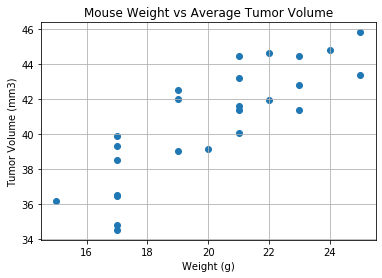

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_avg = capomulin_data.groupby('Mouse ID').mean()
plt.scatter(cap_mouse_avg['Weight (g)'],cap_mouse_avg['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_avg['Weight (g)'],cap_mouse_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],3)}")

The correlation between mouse weight and average tumor volume is 0.842


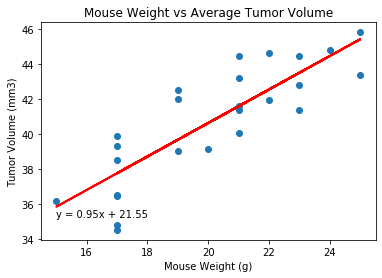

In [18]:
x_ax = cap_mouse_avg['Weight (g)']
y_ax = cap_mouse_avg['Tumor Volume (mm3)']
(slope, intercept, r_value, p_value, st_err) = st.linregress(x_ax, y_ax)
fit = x_ax * slope + intercept
plt.scatter(x_ax, y_ax)
plt.plot(x_ax, fit, 'r', lw=2)
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(equation,(15,35.3))
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
